In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, log_loss

In [2]:
clean_df = pd.read_csv('clean_df_1Mar2024.csv')

In [3]:
# def categorize_age(age):
#     if age < 18:
#         return 0  # Category for minors
#     elif age <= 64:
#         return 1  # Category for adults
#     else:
#         return 2  # Category for seniors

# # Column for age categories
# clean_df['Vict_Age_Category'] = clean_df['Vict_Age'].apply(categorize_age)

In [4]:
data=clean_df

# Convert 'Date_Rptd' and 'DATE_OCC' to datetime
data['Date_Rptd'] = pd.to_datetime(data['Date_Rptd'], format='%m/%d/%Y %I:%M:%S %p')
data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'], format='%Y-%m-%d')


# Extract day of week, month, and year from 'DATE_OCC'
data['Day_of_Week'] = data['DATE_OCC'].dt.dayofweek
data['Month'] = data['DATE_OCC'].dt.month
data['Year'] = data['DATE_OCC'].dt.year

# Drop the original 'Date_Rptd' and 'DATE_OCC' columns
data = data.drop(['Date_Rptd', 'DATE_OCC'], axis=1)

# Convert 'Vict_Sex' and 'Vict_Descent' to dummy variables
categorical_to_convert = ['Vict_Sex', 'Region_Ethnic_Origin']
data = pd.get_dummies(data, columns=categorical_to_convert, drop_first=True)
data['Day_of_Week'] = data['Day_of_Week'].astype('category')
data['Month'] = data['Month'].astype('category')
data['Year'] = data['Year'].astype('category')

# Create dummy variables for these columns
data = pd.get_dummies(data, columns=['Day_of_Week', 'Month', 'Year'], drop_first=True)


# We will not convert 'LOCATION' due to its high cardinality
data.drop(['LOCATION', 'Vict_Descent', 'DR_NO'], axis=1, inplace=True)

In [5]:
data = data.drop(columns=['Crm_Cd_Desc', 'Crime_Category', 'Crm_Cd', 'AREA', 'AREA_NAME','Rpt_Dist_No'], axis = 0)

In [6]:
data.columns

Index(['TIME_OCC', 'Part_1-2', 'Vict_Age', 'LAT', 'LON', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation', 'Crime_Category_Code', 'Weapon_Reported',
       'Vict_Sex_M', 'Vict_Sex_X', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023'],
      dtype='object')

In [7]:
# class_counts = data['Crime_Category_Code'].value_counts()
# print("Class counts before downsampling:\n", class_counts)

# # Find the number of instances in the smallest class
# smallest_class_size = class_counts.min()

# # Create a DataFrame to hold the downsampled data
# downsampled_data = pd.DataFrame()

# # Loop over each class and downsample
# for category in class_counts.index:
#     category_subset = data[data['Crime_Category_Code'] == category]
    
#     # Sample the current category to match the smallest class size
#     category_subset_downsampled = category_subset.sample(n=smallest_class_size, random_state=42)
    
#     # Append the downsampled subset to the downsampled_data DataFrame
#     downsampled_data = pd.concat([downsampled_data, category_subset_downsampled])

# # Shuffle the downsampled dataset to mix the classes
# data = downsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# print("\nAfter downsampling:")
# print(data['Crime_Category_Code'].value_counts())

In [8]:
X_dt_full = data.drop('Crime_Category_Code', axis=1)  # Features
y_dt_full = data['Crime_Category_Code']

In [9]:
X_dt_full_train, X_dt_full_test, y_dt_full_train, y_dt_full_test = train_test_split(X_dt_full, y_dt_full, test_size=0.2, random_state=42)

In [10]:
dt_full_model = DecisionTreeClassifier(random_state=42)

In [11]:
dt_full_model.fit(X_dt_full_train,  y_dt_full_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred_dt_full = dt_full_model.predict(X_dt_full_test)

# Accuracy
accuracy = accuracy_score(y_dt_full_test, y_pred_dt_full)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_dt_full_test, y_pred_dt_full))

# Confusion Matrix


Accuracy: 0.7405
              precision    recall  f1-score   support

           0       0.83      0.82      0.83    143531
           1       0.61      0.60      0.60     41588
           2       0.72      0.74      0.73     92088
           3       0.51      0.51      0.51     26344
           4       0.32      0.34      0.33     13324
           5       0.88      0.87      0.87    187161
           6       0.54      0.54      0.54     54380
           7       0.35      0.36      0.35     18345

    accuracy                           0.74    576761
   macro avg       0.59      0.60      0.60    576761
weighted avg       0.74      0.74      0.74    576761



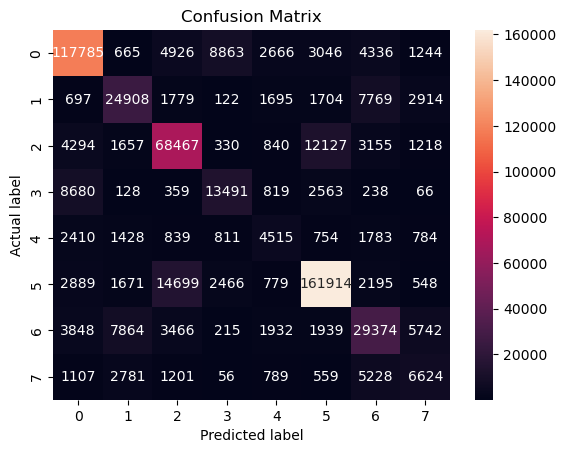

In [13]:
cm = confusion_matrix(y_dt_full_test, y_pred_dt_full)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
X_dt_wo_victim = data.drop(['Crime_Category_Code', 'Vict_Sex_M', 'Vict_Sex_X', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Vict_Age'], axis=1)  # Features
y_dt_wo_victim = data['Crime_Category_Code']

In [15]:
X_dt_wo_victim_train, X_dt_wo_victim_test, y_dt_wo_victim_train, y_dt_wo_victim_test = train_test_split(X_dt_wo_victim, y_dt_wo_victim, test_size=0.2, random_state=42)

In [16]:
dt_wo_victim_model = DecisionTreeClassifier(random_state=42)

In [17]:
dt_wo_victim_model.fit(X_dt_wo_victim_train,  y_dt_wo_victim_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.6475
              precision    recall  f1-score   support

           0       0.82      0.81      0.81    143531
           1       0.60      0.59      0.60     41588
           2       0.45      0.47      0.46     92088
           3       0.50      0.48      0.49     26344
           4       0.25      0.27      0.26     13324
           5       0.75      0.74      0.74    187161
           6       0.53      0.52      0.53     54380
           7       0.33      0.35      0.34     18345

    accuracy                           0.65    576761
   macro avg       0.53      0.53      0.53    576761
weighted avg       0.65      0.65      0.65    576761



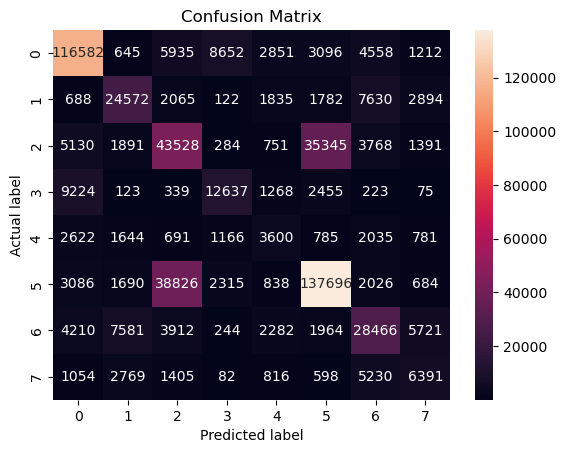

In [18]:
y_pred_wo_victim = dt_wo_victim_model.predict(X_dt_wo_victim_test)

# Accuracy
accuracy = accuracy_score(y_dt_wo_victim_test, y_pred_wo_victim)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_dt_wo_victim_test, y_pred_wo_victim))

# Confusion Matrix
cm = confusion_matrix(y_dt_wo_victim_test, y_pred_wo_victim)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
X_dt_wo_weather = data.drop(['Crime_Category_Code', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation'], axis=1) 
y_dt_wo_weather = data['Crime_Category_Code']

In [20]:
X_dt_wo_weather_train, X_dt_wo_weather_test, y_dt_wo_weather_train, y_dt_wo_weather_test = train_test_split(X_dt_wo_weather, y_dt_wo_weather, test_size=0.2, random_state=42)

In [21]:
dt_wo_weather_model = DecisionTreeClassifier(random_state=42)

In [22]:
dt_wo_weather_model.fit(X_dt_wo_weather_train,  y_dt_wo_weather_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.7433
              precision    recall  f1-score   support

           0       0.83      0.82      0.83    143531
           1       0.61      0.60      0.60     41588
           2       0.72      0.75      0.73     92088
           3       0.52      0.52      0.52     26344
           4       0.33      0.34      0.33     13324
           5       0.88      0.87      0.87    187161
           6       0.55      0.55      0.55     54380
           7       0.36      0.37      0.36     18345

    accuracy                           0.74    576761
   macro avg       0.60      0.60      0.60    576761
weighted avg       0.75      0.74      0.74    576761



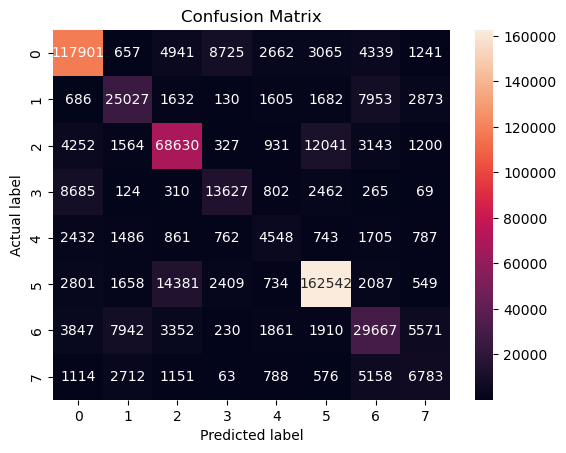

In [23]:
y_pred_wo_weather = dt_wo_weather_model.predict(X_dt_wo_weather_test)

# Accuracy
accuracy = accuracy_score(y_dt_wo_weather_test, y_pred_wo_weather)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_dt_wo_weather_test, y_pred_wo_weather))

# Confusion Matrix
cm = confusion_matrix(y_dt_wo_weather_test, y_pred_wo_weather)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
X_dt_wo_weathervictim = data.drop(['Crime_Category_Code', 'Vict_Sex_M', 'Vict_Sex_X', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Vict_Age', 'Crime_Category_Code', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation'], axis=1)  # Features

y_dt_wo_weathervictim = data['Crime_Category_Code']

In [25]:
X_dt_wo_weathervictim_train, X_dt_wo_weathervictim_test, y_dt_wo_weathervictim_train, y_dt_wo_weathervictim_test = train_test_split(X_dt_wo_weathervictim, y_dt_wo_weathervictim, test_size=0.2, random_state=42)

In [26]:
dt_wo_weathervictim_model = DecisionTreeClassifier(random_state=42)

In [27]:
dt_wo_weathervictim_model.fit(X_dt_wo_weathervictim_train,  y_dt_wo_weathervictim_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.6520
              precision    recall  f1-score   support

           0       0.82      0.82      0.82    143531
           1       0.60      0.60      0.60     41588
           2       0.46      0.48      0.47     92088
           3       0.50      0.49      0.49     26344
           4       0.26      0.27      0.26     13324
           5       0.75      0.74      0.75    187161
           6       0.53      0.53      0.53     54380
           7       0.34      0.36      0.35     18345

    accuracy                           0.65    576761
   macro avg       0.53      0.53      0.53    576761
weighted avg       0.65      0.65      0.65    576761



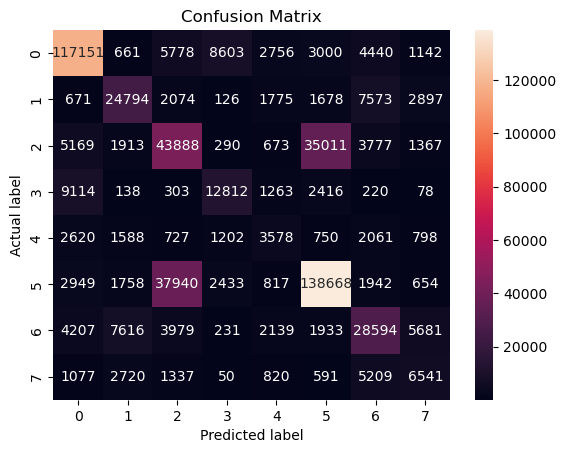

In [28]:
y_pred_wo_weathervictim = dt_wo_weathervictim_model.predict(X_dt_wo_weathervictim_test)

# Accuracy
accuracy = accuracy_score(y_dt_wo_weathervictim_test, y_pred_wo_weathervictim)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_dt_wo_weathervictim_test, y_pred_wo_weathervictim))

# Confusion Matrix
cm = confusion_matrix(y_dt_wo_weathervictim_test, y_pred_wo_weathervictim)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
def plot_feature_importances(model, features, model_name):
    # Get feature importances
    importances = model.feature_importances_
    
    # Create a DataFrame for easy plotting
    feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    
    # Sort the DataFrame by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 15))  # Set figure size
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

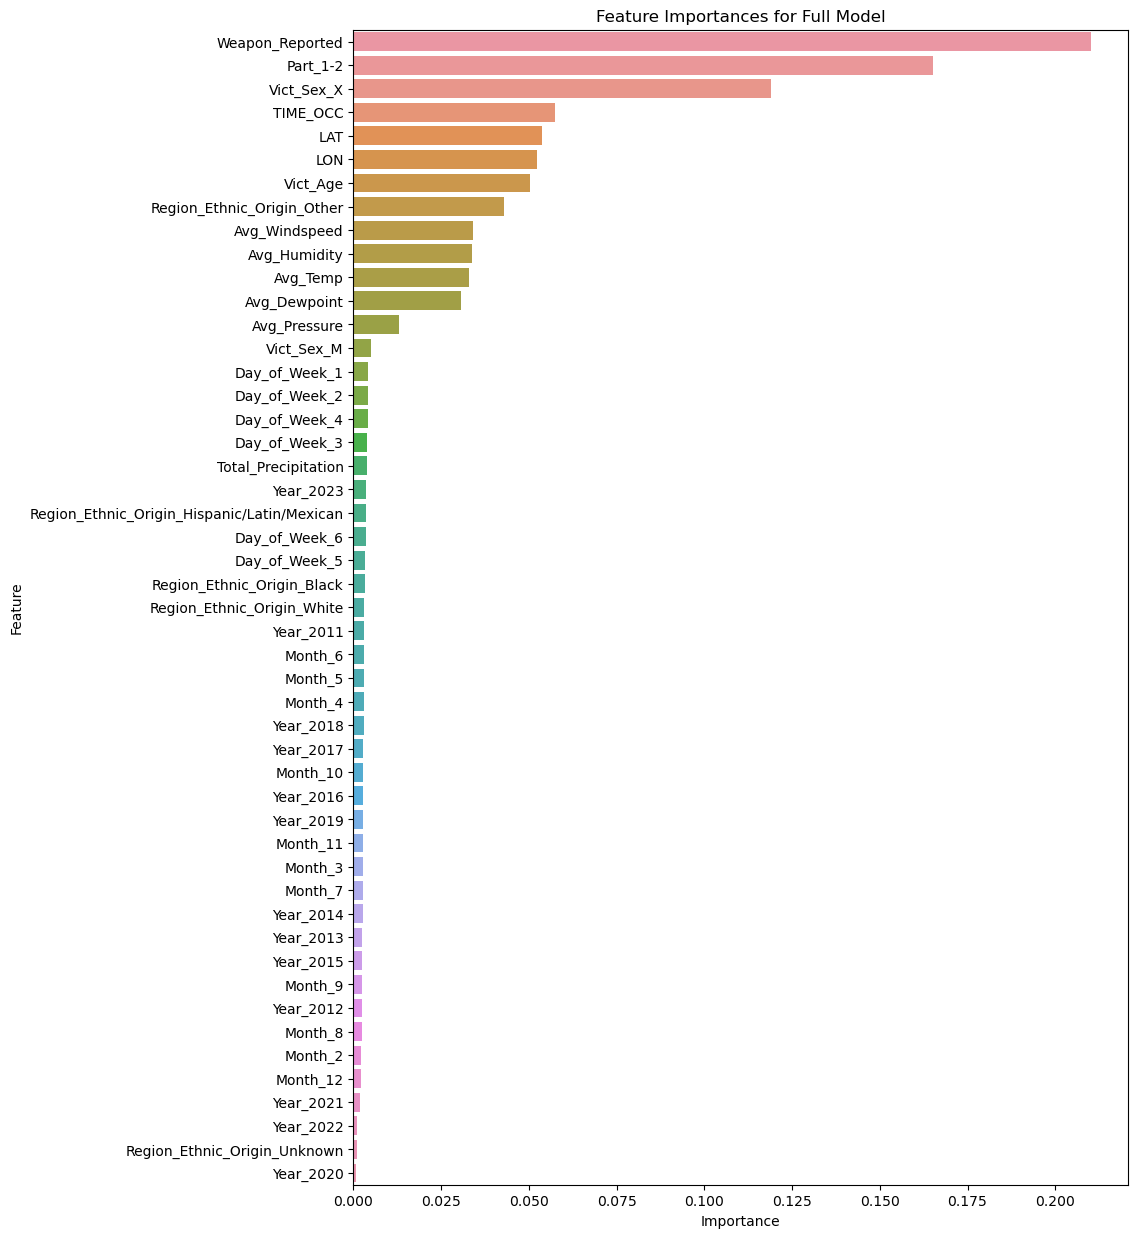

In [30]:
plot_feature_importances(dt_full_model, X_dt_full.columns, "Full Model")

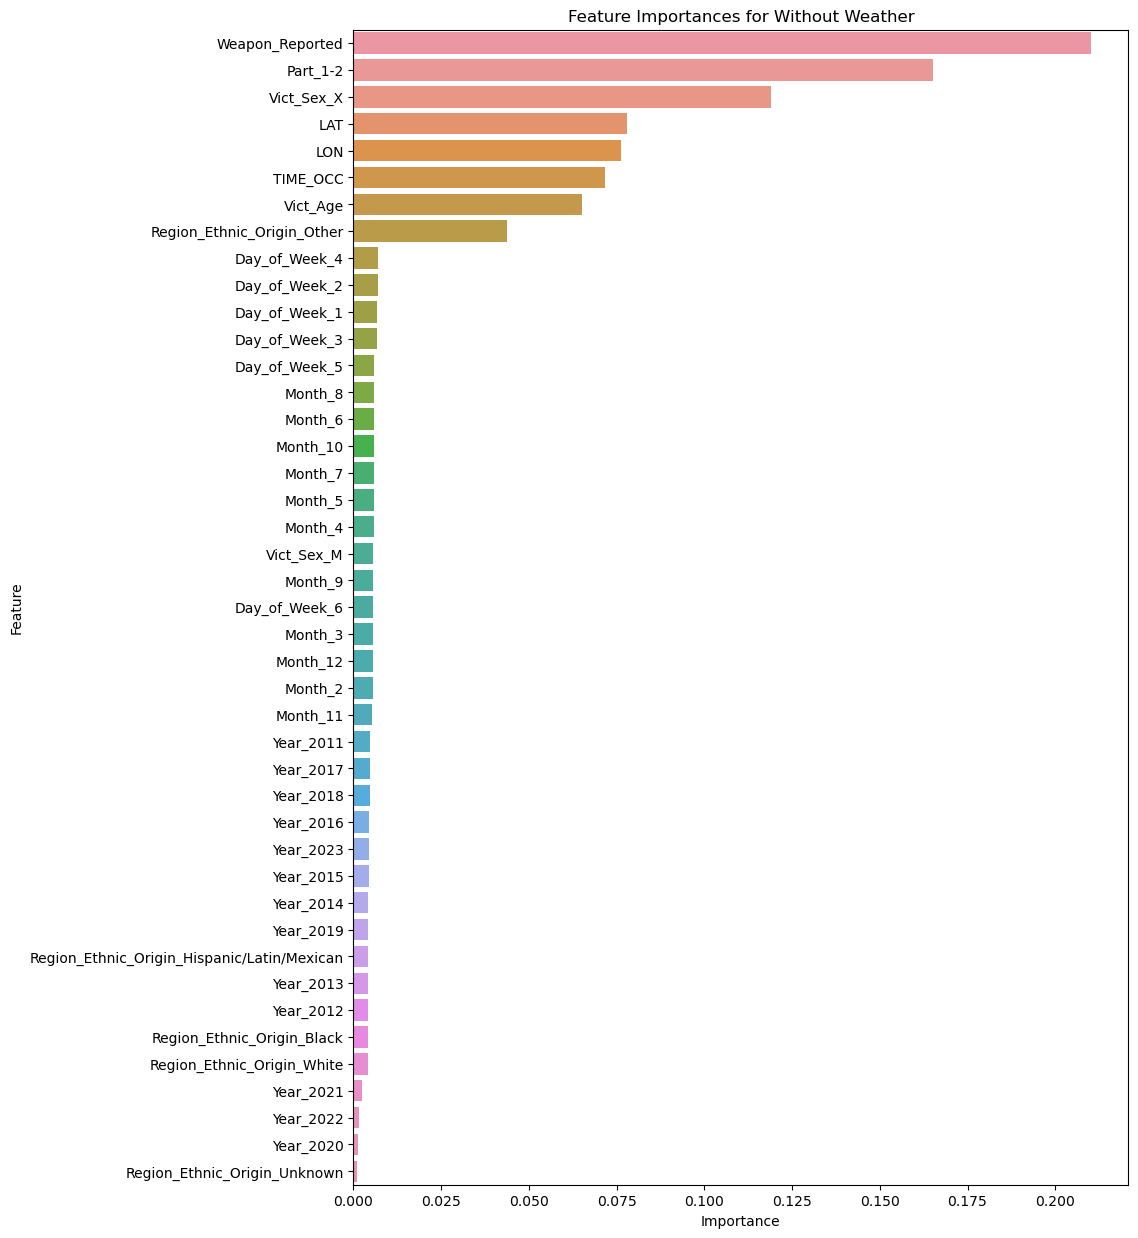

In [31]:
plot_feature_importances(dt_wo_weather_model, X_dt_wo_weather.columns, "Without Weather")

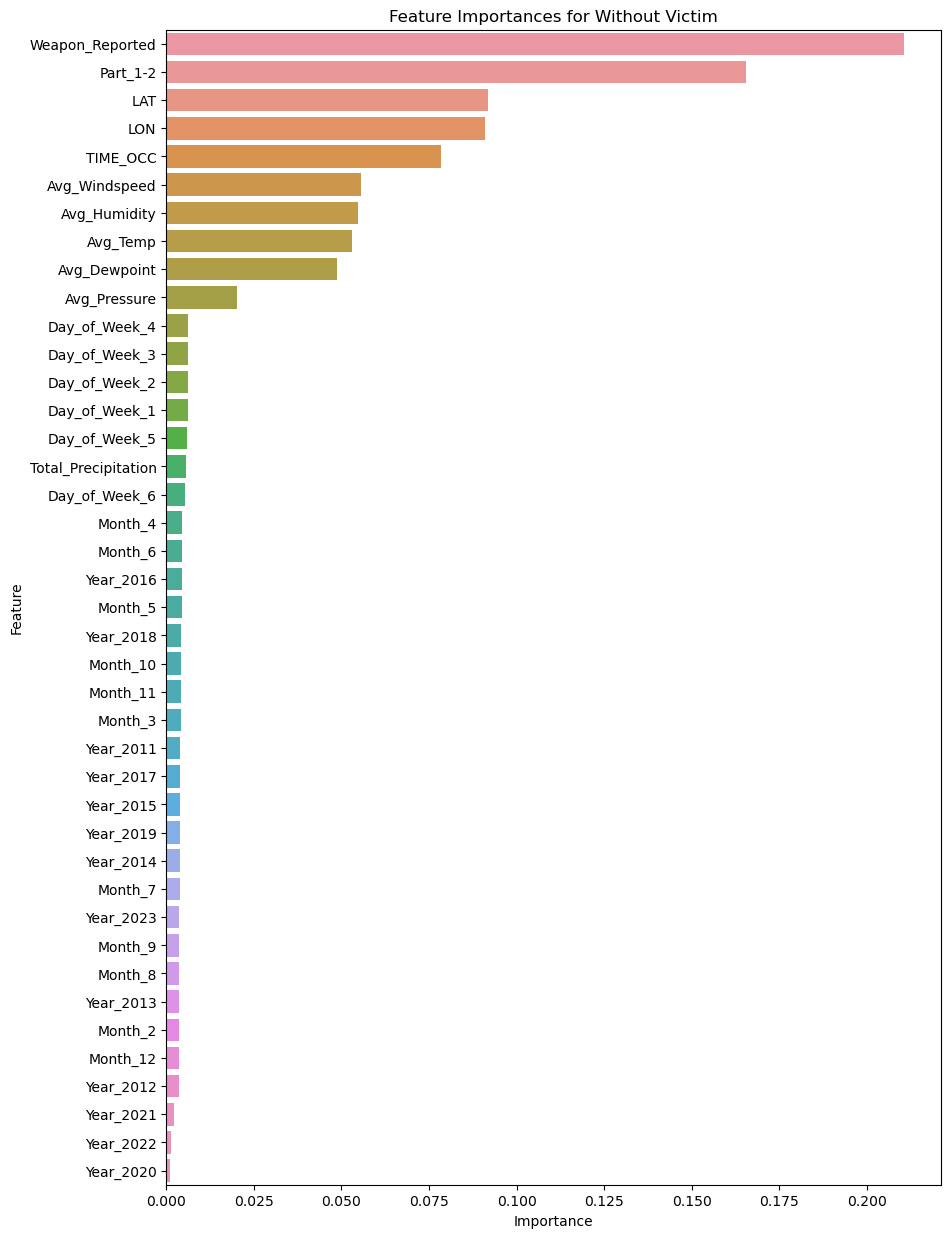

In [32]:
plot_feature_importances(dt_wo_victim_model, X_dt_wo_victim.columns, "Without Victim")

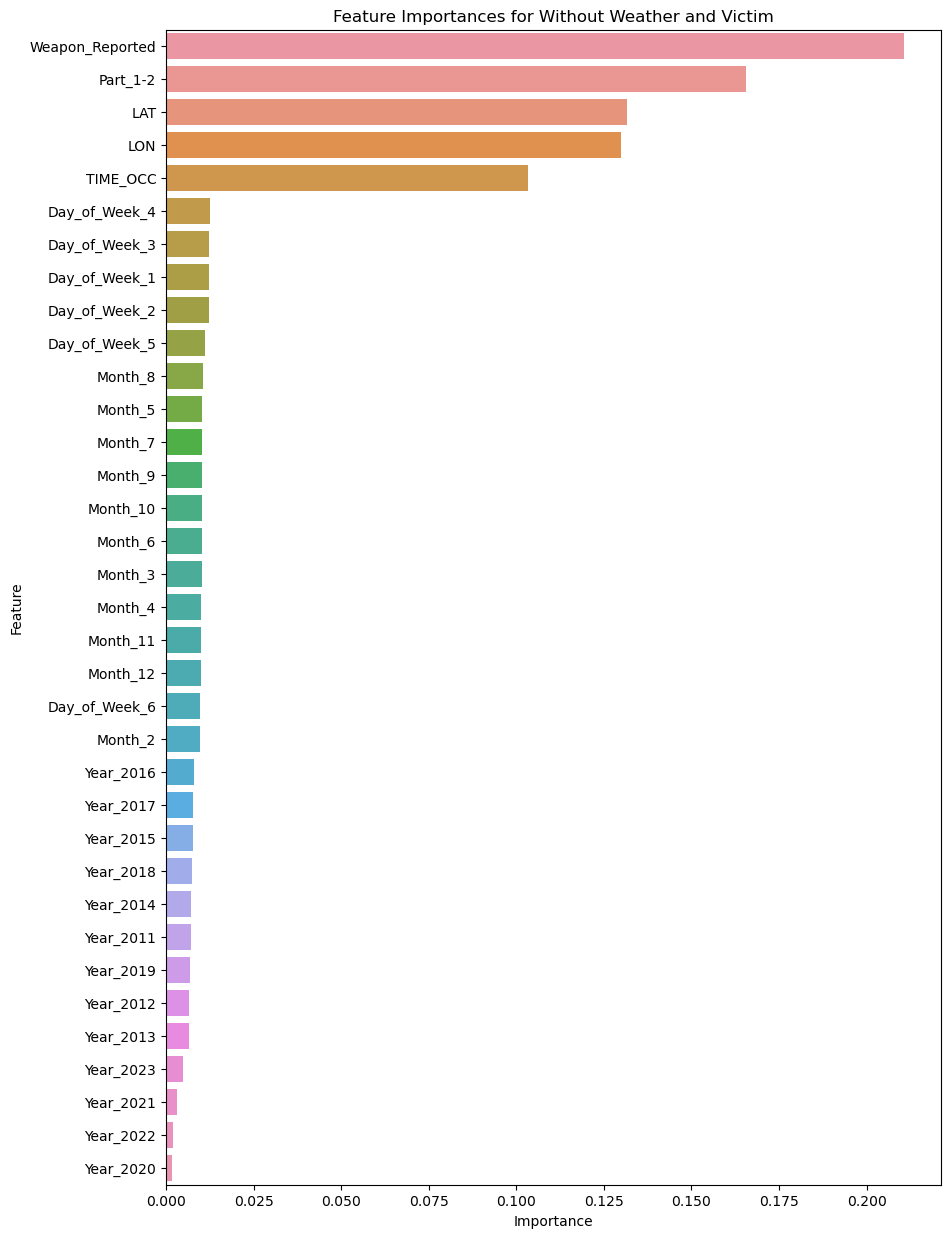

In [33]:
plot_feature_importances(dt_wo_weathervictim_model, X_dt_wo_weathervictim.columns, "Without Weather and Victim")

In [34]:
mcc = matthews_corrcoef(y_dt_full_test, y_pred_dt_full)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

Matthews Correlation Coefficient: 0.6719


In [35]:
cohen_kappa = cohen_kappa_score(y_dt_full_test, y_pred_dt_full)
print(f"Cohen's Kappa: {cohen_kappa:.4f}")

Cohen's Kappa: 0.6718


In [36]:
y_pred_proba = dt_full_model.predict_proba(X_dt_full_test)
logloss = log_loss(y_dt_full_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

Log Loss: 9.3448


In [37]:
mcc = matthews_corrcoef(y_dt_wo_weather_test, y_pred_wo_weather)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
cohen_kappa = cohen_kappa_score(y_dt_wo_weather_test, y_pred_wo_weather)
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
y_pred_proba_wo_weather = dt_wo_weather_model.predict_proba(X_dt_wo_weather_test)
logloss = log_loss(y_dt_wo_weather_test, y_pred_proba_wo_weather)  # Use probabilities here
print(f"Log Loss: {logloss:.4f}")

Matthews Correlation Coefficient: 0.6754
Cohen's Kappa: 0.6754
Log Loss: 9.2424


In [38]:
mcc = matthews_corrcoef(y_dt_wo_victim_test, y_pred_wo_victim)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
cohen_kappa = cohen_kappa_score(y_dt_wo_victim_test, y_pred_wo_victim)
print(f"Cohen's Kappa: {cohen_kappa:.4f}")

# Correctly use the predict_proba method for log_loss calculation
y_pred_proba_wo_victim = dt_wo_victim_model.predict_proba(X_dt_wo_victim_test)
logloss = log_loss(y_dt_wo_victim_test, y_pred_proba_wo_victim)  # Use probabilities here
print(f"Log Loss: {logloss:.4f}")

Matthews Correlation Coefficient: 0.5543
Cohen's Kappa: 0.5543
Log Loss: 12.6691


In [39]:
mcc = matthews_corrcoef(y_dt_wo_weathervictim_test, y_pred_wo_weathervictim)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
cohen_kappa = cohen_kappa_score(y_dt_wo_weathervictim_test, y_pred_wo_weathervictim)
print(f"Cohen's Kappa: {cohen_kappa:.4f}")

# Correctly use the predict_proba method for log_loss calculation
y_pred_proba_wo_weathervictim = dt_wo_weathervictim_model.predict_proba(X_dt_wo_weathervictim_test)
logloss = log_loss(y_dt_wo_weathervictim_test, y_pred_proba_wo_weathervictim)  # Use probabilities here
print(f"Log Loss: {logloss:.4f}")

Matthews Correlation Coefficient: 0.5598
Cohen's Kappa: 0.5598
Log Loss: 12.5040
